Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 

In [46]:
#Cargar Las Librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos

import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# Librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

# Librerias de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Libreria para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows
import warnings

warnings.filterwarnings ('ignore')

In [47]:
#lectura de datos en python y lo cargamos en la variable Datos
Datos = pd.read_csv('./Dataset_Mall_Customers.csv')

In [48]:
#Realizamos lectura de los Datos para el análisis exploratorio 
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40
5,6,2,22,17,76
6,7,2,35,18,6
7,8,2,23,18,94
8,9,1,64,19,3
9,10,2,30,19,72


*Para el desarrollo de la Actividad se le asigno al genero masculino el numero 1 y al ganero femenino el numero 2*

In [49]:
# Descripción de los datos
Datos.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

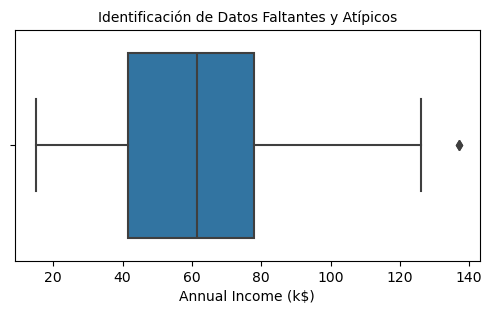

In [50]:
#identificación de Datos Faltantes y Atípicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title ('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 

In [51]:
# Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ", Datos['Age'].isin([0]).sum())

print("Cantidad de Registros con cero en Ingreso Anual (k$): ", Datos['Annual Income (k$)'].isin([0]).sum())

print("Cantidad de Registros con cero en Puntuación de Gasto: ", Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual (k$):  0
Cantidad de Registros con cero en Puntuación de Gasto:  0


In [52]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna

Datos['Annual Income (k$)'] = Datos['Annual Income (k$)'].replace(0, Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

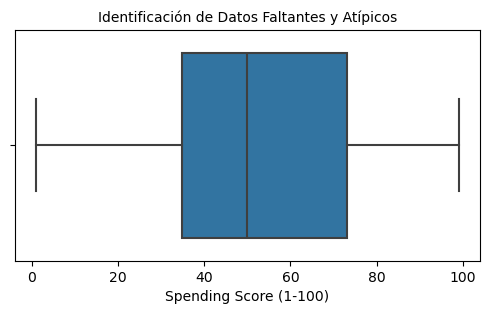

In [53]:
# Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))

sns.boxplot(x=Datos['Spending Score (1-100)'])

plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [54]:
#Conteo de Datos Atípicos 

nivel_minimo=0
nivel_maximo=100
Total_Atipico=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipico))

El total de datos atipicos es 0


In [55]:
#Revision del tipo de datos y datos faltantes 

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.

In [56]:
#Filtrar columnas del modelo 
Datos = Datos [["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [58]:
#Revisión de los datos de las variables objetivo 
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


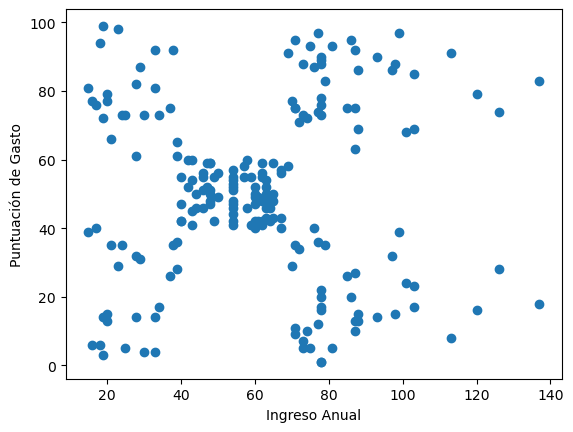

In [66]:
#Grafica antes del agrupamiento 

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.show()

Entrenar el modelo configurando los diferentes 
hiperparámetros.

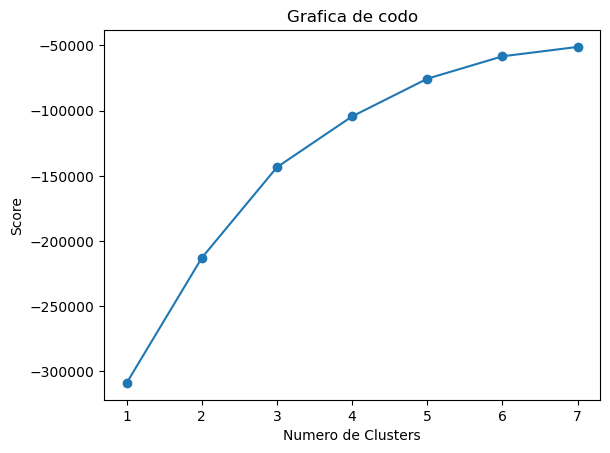

In [69]:
#Se realiza grafica de codo para identificar valor de K
Nc = range(1,8)
kmeans=[KMeans(n_clusters=i) for i in Nc]
score=[kmeans[i].fit(Datos).score(Datos) for i in range (len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Grafica de codo')
plt.show()


In [73]:
#Generación del modelo de agrupamiento del modelo con K=7 (es decir haremos 7 grupos de agrupamiento)

Modelo = KMeans(n_clusters=7, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=7, random_state=0)

In [74]:
#Se agrega la columna grupo  a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"]= Modelo.labels_
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      4
1     21                  15                      81      5
2     20                  16                       6      4
3     23                  16                      77      5
4     31                  17                      40      4
..   ...                 ...                     ...    ...
195   35                 120                      79      0
196   45                 126                      28      6
197   32                 126                      74      0
198   32                 137                      18      6
199   30                 137                      83      0

[200 rows x 4 columns]


Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [79]:
#Desempeño del modelo con el coeficiente del Silhouette el indice del Calinski-Harabasz y el indice de Davies Bouldin Score

#Preparación de la metrica de la columna Grupo 
Observaciones = len(Datos)
X = Datos.drop('Grupo',axis=1)
clusters = Datos['Grupo']

#se calculan las métricas 
sil_score = silhouette_score(X, clusters) 
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

#se crea una tabla para mostrar los valores de las metricas 
table_data =[
    ["Numero de Observaciones", Observaciones], 
    ["Coeficiente Silhoutte", sil_score], 
    ["Indice Calinski Harabasz", calinski_score], 
    ["Indice Davies Bouldin", davies_score], 
]

#imprime la tabla

from tabulate import tabulate 
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhoutte   | 0.4412807576186172 |
| Indice Calinski Harabasz | 162.2852042279988  |
|  Indice Davies Bouldin   | 0.7863764854525304 |
+--------------------------+--------------------+


Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo

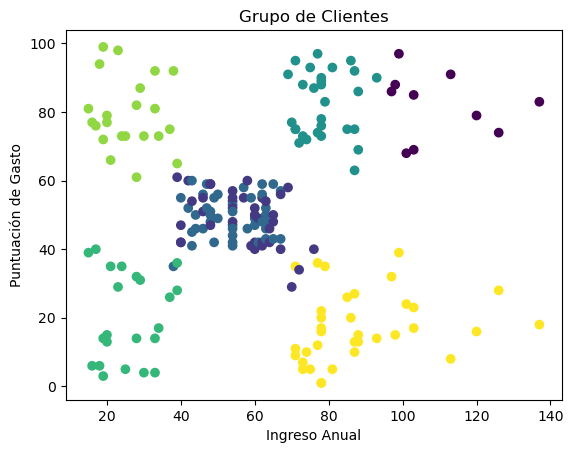

In [83]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Grupo de Clientes')
plt.show()

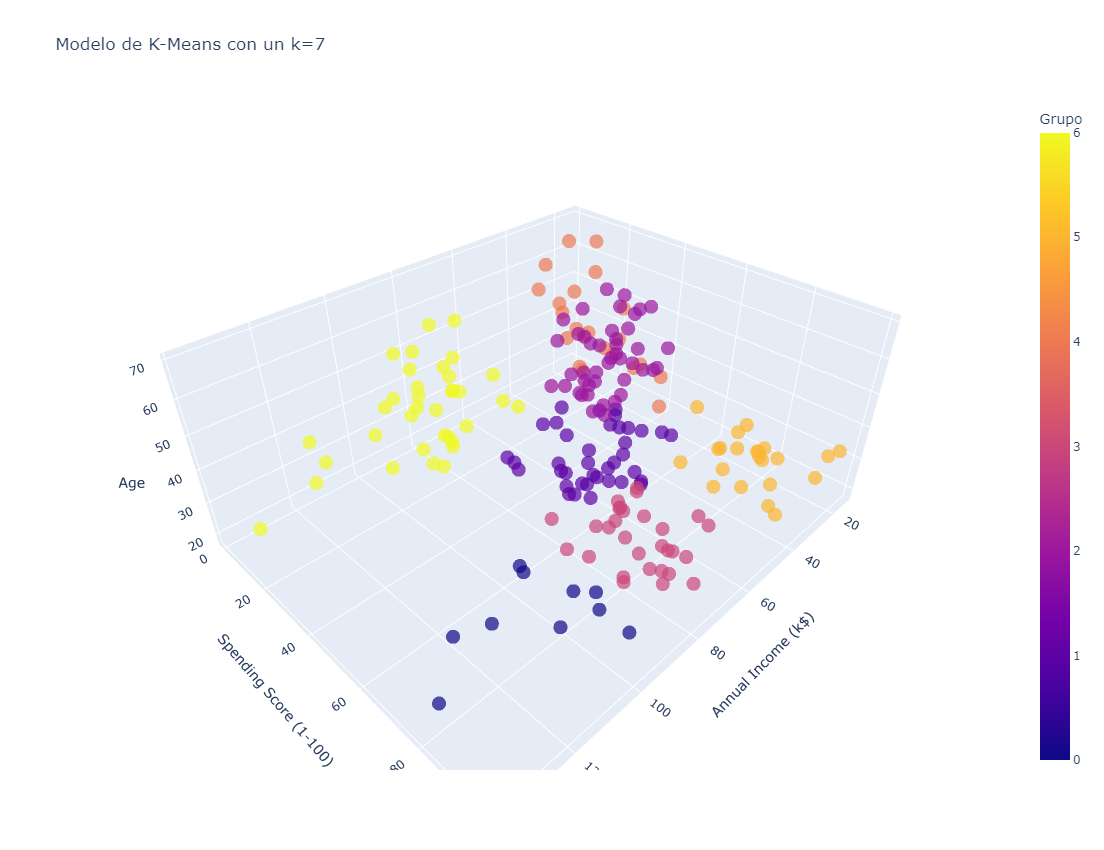

In [85]:
#Crear un modelo 3D de los datos agrupados 

Grafica_3D = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)',z='Age', color='Grupo', symbol_map= {0: 'circle', 1: 'circle', 2:'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={7}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

Interpretar, analizar y documentar los resultados obtenidos.